In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import os
os.chdir('c:\\Users\\TKW\\desktop')
os.getcwd()

'c:\\Users\\TKW\\desktop'

In [3]:
data = pd.read_excel("indo_male.xlsx")
data.head(10)

,Occupation,Status,Interests
0,Chef,1 year ago,"Dining out,Coffee & tea,Cooking,Music,Travel,A..."
1,Consultant,1 year ago,"Dining out,Coffee & tea,Movies,Music,Games,Arts"
2,Student,1 year ago,"Mandarin,Dining out,Coffee & tea,Wine,Movies,T..."
3,Consultant,1 year ago,"Dining out,Movies,Music,Games,Travel,Anime & m..."
4,Student,1 year ago,"Dining out,Coffee & tea,Wine,Cooking,Music,Gam..."
5,Distributor,1 year ago,Mandarin
6,Entrepreneur,1 year ago,"Japanese,Mandarin,Coffee & tea,Cooking,Movies,..."
7,Accounting,1 year ago,"Mandarin,Dining out,Movies,Music,Games,Compute..."
8,Entrepreneur,1 year ago,"Mandarin,Movies,Music,Games,Travel,Arts,Photog..."
9,Architect,1 year ago,"Korean,Movies,Music,Games,Photography"


In [4]:
len(data) # Sample size

394

## Interests
We break down the frequency that each interest shows up on our sample of profiles.

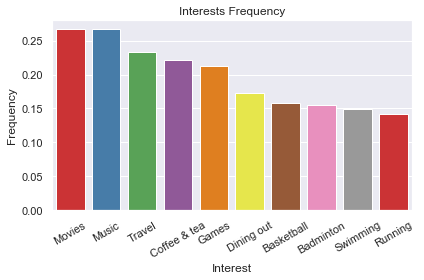

In [5]:
# Find the top 10 most common interests

def word_count(str):
    counts = dict()
    words = str.split(',')

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

interests = []
k = 1 
while k < len(data):
    interests.append(str(data['Interests'][k]))
    k += 1

total_interests = str(',').join(interests)
interest_count = word_count(total_interests)
del(interest_count['nan'])

interests_names = []
interests_counts = []
l = 0
for w in sorted(interest_count, key=interest_count.get, reverse=True):
    interests_names.append(w)
    interests_counts.append(interest_count[w]/len(data))
    l += 1
    if l == 10:
        break

interest_plot = sns.barplot(x=interests_names, y=interests_counts, palette='Set1')
interest_plot.set_xticklabels(interest_plot.get_xticklabels(), rotation=30, ha="center")
interest_plot.set_title('Interests Frequency')
interest_plot.set_xlabel('Interest')
interest_plot.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

From the data, we can see that the top 3 most common interests are movies, music, and travel.

## Occupations
We break down the number of times that each occupation shows up on our sample of profiles.

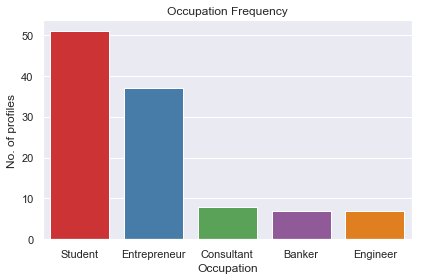

In [6]:
#Find the top 5 most common occupations

job_plot = sns.countplot(x='Occupation', data=data, palette='Set1', order=data['Occupation'].value_counts().iloc[:5].index)
job_plot.set_title('Occupation Frequency')
job_plot.set_xlabel('Occupation')
job_plot.set_ylabel('No. of profiles')
plt.tight_layout()
plt.show()

From the data, we can see that a large proportion of users declare themselves as students and entrepreneurs.